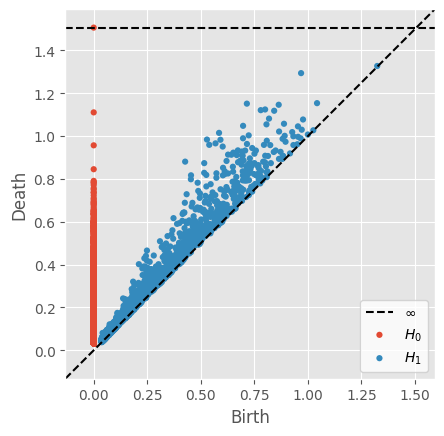

In [ ]:
import numpy as np
from numpy.lib.stride_tricks import sliding_window_view
import librosa
import matplotlib.pyplot as plt

plt.style.use("ggplot")

# step 1: Load Audio Files
def load_audio(uid: int, sr_target=16000, max_duration=None):
    try:
        wav_path = f"./audio/{uid}_AUDIO.wav"
    except:
        wav_path = f"wav_files/{uid}_AUDIO.wav"
    # 
    if max_duration is None:
        y, sr = librosa.load(wav_path, sr=sr_target)
    else:
        y, sr = librosa.load(wav_path, sr=sr_target, duration=max_duration)
    return y, sr

# step 2: Convert to a Time-Series Windowed Representation
UID = 300

audio, sr = load_audio(UID)
window_size = 1024
hop_size = 256
windows = sliding_window_view(audio, window_shape=window_size)[::hop_size]

# step 3: Perform Dimensionality Reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
point_cloud = pca.fit_transform(windows)

# step 4: Downsampling with Farthest Point Sampling
"""
from sklearn.metrics import pairwise_distances_argmin_min

def farthest_point_sampling(point_cloud, k):
    n = point_cloud.shape[0]
    selected = [np.random.randint(0, n)]
    distances = np.full(n, np.inf)
    for _ in range(1, k):
        dist_to_last = np.linalg.norm(point_cloud - point_cloud[selected[-1]], axis=1)
        distances = np.minimum(distances, dist_to_last)
        selected.append(np.argmax(distances))
    return point_cloud[selected]

point_cloud_sub = farthest_point_sampling(point_cloud, k=3000)
"""
from gudhi.subsampling import choose_n_farthest_points

sub = choose_n_farthest_points(points=point_cloud, nb_points=3000)

# step 5: Compute persistence diagrams and betti curves
from ripser import ripser

diagrams = ripser(np.asarray(sub))['dgms']

# step 6: Vectorization
"""
from gudhi.representations.vector_methods import BettiCurve

bc = BettiCurve()
bettis = bc.fit_transform(diagrams)
"""

# step 7: Plot
from persim import plot_diagrams

plot_diagrams(diagrams, show=True)